https://github.com/hengluchang/visualizing_contextual_vectors
이 소스는 위의 github주소에 기반합니다.

***ELMO Visualization을 위한 파이썬 패키지 설치***

In [0]:
!pip3 install allennlp
!pip3 install sklearn
!pip3 install matplotlib
!pip3 install numpy

     |████████████████████████████████| 7.6MB 4.7MB/s 
     |████████████████████████████████| 256kB 38.2MB/s 
     |████████████████████████████████| 163kB 50.0MB/s 
     |████████████████████████████████| 194kB 44.8MB/s 
     |████████████████████████████████| 245kB 45.5MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 133kB 53.5MB/s 
     |████████████████████████████████| 1.0MB 45.2MB/s 
     |████████████████████████████████| 675kB 52.9MB/s 
  Created wheel for jsonnet: filename=jsonnet-0.14.0-cp36-cp36m-linux_x86_64.whl size=3320324 sha256=4bd5844fab69710e2415ec2c9c2e25c067842f8e8c03ee46a6f636f03116301d
  Stored in directory: /root/.cache/pip/wheels/5b/b7/83/985f0f758fbb34f14989a0fab86d18890d1cc5ae12f26967bc
  Created wheel for numpydoc: filename=numpydoc-0.9.1-cp36-none-any.whl size=31872 sha256=3c0f58c8677824d6a9f8a93e95a007bb1df04ab5b49c3f5ea7e5bc7ad9cae523
  Stored in direc

***패키지 import***

In [0]:
from collections import OrderedDict

import numpy as np
from allennlp.commands.elmo import ElmoEmbedder
from sklearn.decomposition import PCA

***ELMO 클래스 선언***

In [0]:
class Elmo:
    def __init__(self):
        self.elmo = ElmoEmbedder()
    
    # ELMO 벡터 반환 함수.
    # 입력 token들과 layer에 따라 반환
    def get_elmo_vector(self, tokens, layer):
        vectors = self.elmo.embed_sentence(tokens)
        X = []
        for vector in vectors[layer]:
            X.append(vector)

        X = np.array(X)

        return X

***차원 축소 함수***

In [0]:
def dim_reduction(X, n):
    pca = PCA(n_components=n)
    print("size of X: {}".format(X.shape))
    results = pca.fit_transform(X)
    print("size of reduced X: {}".format(results.shape))

    for i, ratio in enumerate(pca.explained_variance_ratio_):
        print("Variance retained ratio of PCA-{}: {}".format(i+1, ratio))

    return results

***2차원으로 표현된 벡터 png파일로 저장하는 함수***

In [0]:
def plot(word, token_list, reduced_X, file_name, title):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()

    # plot ELMo vectors
    i = 0
    for j, token in enumerate(token_list):
        color = pick_color(j)
        for _, w in enumerate(token):

            # only plot the word of interest
            if w.lower() in [word, word + 's', word + 'ing', word + 'ed']:
                ax.plot(reduced_X[i, 0], reduced_X[i, 1], color)
            i += 1

    tokens = []
    for token in token_list:
        tokens += token

    # annotate point
    k = 0
    for i, token in enumerate(tokens):
        if token.lower() in [word, word + 's', word + 'ing', word + 'ed']:
            text = ' '.join(token_list[k])

            # bold the word of interest in the sentence
            text = text.replace(token, r"$\bf{" + token + "}$")

            plt.annotate(text, xy=(reduced_X[i, 0], reduced_X[i, 1]))
            k += 1

    ax.set_title(title)
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    fig.savefig(file_name, bbox_inches="tight")

    print("{} saved\n".format(file_name))

***벡터에 표현된 point 색지정***

In [0]:
def pick_color(i):
    if i == 0:
        color = 'ro'
    elif i == 1:
        color = 'bo'
    elif i == 2:
        color = 'yo'
    elif i == 3:
        color = 'go'
    else:
        color = 'co'
    return color

***Main***

100%|██████████| 374434792/374434792 [00:05<00:00, 66786891.20B/s]


visualizing word plant using ELMo layer 1
size of X: (47, 1024)
size of reduced X: (47, 2)
Variance retained ratio of PCA-1: 0.09539473801851273
Variance retained ratio of PCA-2: 0.07188064604997635
plant_elmo_layer_1.png saved

visualizing word plant using ELMo layer 2
size of X: (47, 1024)
size of reduced X: (47, 2)
Variance retained ratio of PCA-1: 0.10498975217342377
Variance retained ratio of PCA-2: 0.07778076827526093
plant_elmo_layer_2.png saved



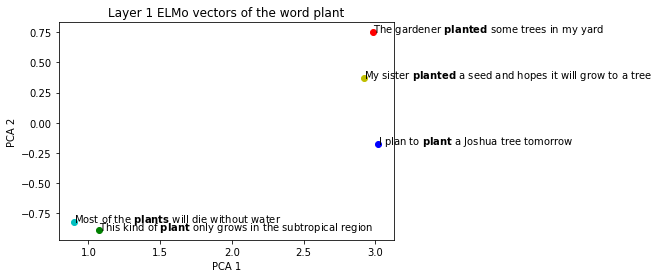

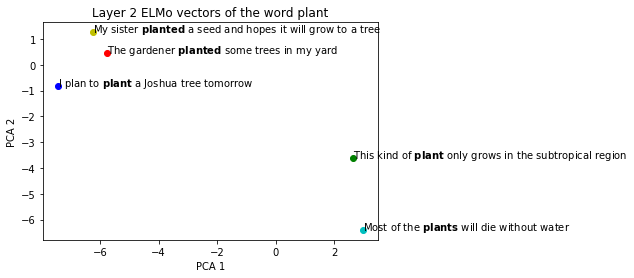

In [0]:
if __name__ == "__main__":
    model = Elmo()
    # Bank에 대한 문장 선언.
#     banks = OrderedDict()
#     # 은행관련 문장
#     banks[0] = "One can deposit money at the bank"
#     # 강둑관련 문장
#     banks[1] = "He had a nice walk along the river bank"
#     # 은행관련 문장
#     banks[2] = "I withdrew cash from the bank"
#     # 강둑관련 문장
#     banks[3] = "The river bank was not clean"
#     # 은행관련 문장
#     banks[4] = "My wife and I have a joint bank account"
    
    
#     # Work에 대한 문장 선언.
#     works = OrderedDict()
#     # 명사로써 이해
#     works[0] = "I like this beautiful work by Andy Warhol"
#     # 동사로써 이해
#     works[1] = "Employee works hard every day"
#     # 동사로써 이해
#     works[2] = "My sister works at Starbucks"
#     # 명사로써 이해
#     works[3] = "This amazing work was done in the early nineteenth century"
#     # 동사로써 이해
#     works[4] = "Hundreds of people work in this building"
    
    # Plants에 관련 문장 선언. 
    plants = OrderedDict()
    # 심는다의 의미.
    plants[0] = "The gardener planted some trees in my yard"
    # 심는다의 의미.
    plants[1] = "I plan to plant a Joshua tree tomorrow"
    # 심는다의 의미.
    plants[2] = "My sister planted a seed and hopes it will grow to a tree"
    # 식물의 의미.
    plants[3] = "This kind of plant only grows in the subtropical region"
     # 식물의 의미.
    plants[4] = "Most of the plants will die without water"

    words = {
#         "bank": banks,
#         "work": works,
        "plant": plants
    }

    # Elmo의 Layer마다의 출력 결과 비교.
    for layer in [1, 2]:
        for word, sentences in words.items():
            print("visualizing word {} using ELMo layer {}".format(word, layer))
            X = np.concatenate([model.get_elmo_vector(tokens=sentences[idx].split(),
                                                      layer=layer)
                                for idx, _ in enumerate(sentences)], axis=0)

            # 2차원으로 축소
            X_reduce = dim_reduction(X=X, n=2)

            token_list = []
            for _, sentence in sentences.items():
                token_list.append(sentence.split())

            file_name = "{}_elmo_layer_{}.png".format(word, layer)
            title = "Layer {} ELMo vectors of the word {}".format(layer, word)
            plot(word, token_list, X_reduce, file_name, title)